# Comparing Neighborhood 

<b> Here I'am comparing Electronic City neighborhood of Banglore with the Neighborhood of South-Mumbai, as my client got transfered from Banglore to Mumbai</b>

Importing all the libraries

In [61]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [62]:
address = 'Electronic City, Bengaluru, Karnataka' # Getting Latitude and Longitude of Electronic city Banglore

geolocator = Nominatim(user_agent="banglore_explorer")
location = geolocator.geocode(address)
electronic_latitude = location.latitude
electronic_longitude = location.longitude
print(electronic_latitude, electronic_longitude)

12.9791198 77.5912997


In [63]:
# Following are the Latitude and Longitude of Infosys Banglore
infosys_bang_latitude = 12.845351
infosys_bang_longitude = 77.663491

In [64]:
# Following are the Latitude and Longitude of Infosys Mumbai
address = 'Nariman Point, Mumbai, Maharashtra 400021, India'

geolocator = Nominatim(user_agent="mumbai_explorer")
location = geolocator.geocode(address)
infosys_mumb_latitude = location.latitude
infosys_mumb_longitude = location.longitude
print(infosys_mumb_latitude, infosys_mumb_longitude)

18.9259514 72.8232083


In [65]:
# import the library we use to open URLs
import urllib.request
#!pip install bs4
# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

In [66]:
# specifying URL for scraping
url = "https://en.wikipedia.org/wiki/List_of_neighbourhoods_in_Mumbai"

In [67]:
# open the url using urllib.request and putting the HTML into the page variable
page = urllib.request.urlopen(url)
# parsing the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")
right_table=soup.find('table', class_='wikitable sortable')

In [68]:
# appending all the contents of table into following list
A=[]
B=[]
C=[]
D=[]

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==4:
        A.append(cells[0].find(text=True))
        B.append(cells[1].find(text=True))
        C.append(cells[2].find(text=True))
        D.append(cells[3].find(text=True))

In [69]:
def remove_special_character(LIST):  # To remove special character like "/n" from above list
    out_list = list(map(str.strip, LIST))
    return (out_list)

In [70]:
neigh = remove_special_character(A)
boro = remove_special_character(B)
lati = remove_special_character(C)
longi = remove_special_character(D)

In [71]:
df = pd.DataFrame(neigh, columns= ["Neighborhood"]) #creating Dataframe
df["Borough"] = boro
df["Latitude"] = lati
df["Longitude"] = longi
df.head()

,Neighborhood,Borough,Latitude,Longitude
0,Amboli,"Andheri,Western Suburbs",19.1293,72.8434
1,"Chakala, Andheri",Western Suburbs,19.111388,72.860833
2,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373
3,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.82721
4,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.82927


<b> Now I have to obtain Neighborhood near South-Mumbai only as my client got Tranferred there</b>

In [72]:
new_df = df[df["Borough"] == "South Mumbai"]
new_df.reset_index(drop=True, inplace=True)
new_df.head()

,Neighborhood,Borough,Latitude,Longitude
0,Agripada,South Mumbai,18.9777,72.8273
1,Altamount Road,South Mumbai,18.9681,72.8095
2,Bhuleshwar,South Mumbai,18.95,72.83
3,Breach Candy,South Mumbai,18.967,72.805
4,Carmichael Road,South Mumbai,18.9722,72.8113


In [73]:
new_df.shape

(30, 4)

In [74]:
# Coverting dtypes
new_df["Latitude"] = pd.to_numeric(new_df["Latitude"], downcast="float")
new_df["Longitude"] = pd.to_numeric(new_df["Longitude"], downcast="float")
new_df.dtypes

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Neighborhood     object
Borough          object
Latitude        float32
Longitude       float32
dtype: object

In [75]:
# Displaying Map of South-Mumbai
mumbai_map = folium.Map(location=[infosys_mumb_latitude, infosys_mumb_longitude], zoom_start=12)

neighborhood = folium.map.FeatureGroup()

for lat, long, borough, neighhood in zip(new_df["Latitude"], new_df["Longitude"], new_df["Borough"], new_df["Neighborhood"]):
    label = '{}, {}'.format(neighhood, borough)
    label = folium.Popup(label, parse_html=True)
    neighborhood.add_child(
        folium.features.CircleMarker(
            [lat, long],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity= 0.6,
            parse_html=False
        )
    )  

folium.Marker([infosys_mumb_latitude,infosys_mumb_longitude ], popup="Infosys Limited").add_to(mumbai_map)

mumbai_map.add_child(neighborhood)

In [76]:
#Displaying Map of my client present neighborhood which is Electronic city
banglore_map= folium.Map(location=[infosys_bang_latitude, infosys_bang_longitude], zoom_start=10)
folium.features.CircleMarker(
            [electronic_latitude, electronic_longitude],
            radius=5,
            popup="Electronic City",
            color='blue',
            fill=True,
            fill_color='#3186cc',
            fill_opacity= 0.6,
            parse_html=False
        ).add_to(banglore_map)
folium.Marker([infosys_bang_latitude,infosys_bang_longitude ], popup="Infosys Limited Banglore").add_to(banglore_map)

banglore_map

In [100]:
# The code was removed by Watson Studio for sharing.

In [78]:
# This function will extract nearby venues for a given latitude and longitude
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    LIMIT = 100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

<b> Now I'am appending Banglore Electronic city to South_Mumbai Neighborhood for futher analysis of similarity</b>

In [79]:
e_df = pd.DataFrame(data= [("Electronic city", "Banglore", electronic_latitude, electronic_longitude)], columns= ["Neighborhood","Borough","Latitude","Longitude"])
new_df = new_df.append(e_df, ignore_index = True)
new_df.tail()

,Neighborhood,Borough,Latitude,Longitude
26,Worli,South Mumbai,19.000000,72.815002
27,Matunga,South Mumbai,19.017981,72.844765
28,Parel,South Mumbai,18.990000,72.839996
29,Dava Bazaar,South Mumbai,18.946882,72.831360
30,Electronic city,Banglore,12.979120,77.591300


In [80]:
# This will get all nearby venues
mumbai_venues = getNearbyVenues(names= new_df['Neighborhood'],
                                   latitudes= new_df['Latitude'],
                                   longitudes= new_df['Longitude']
                                  )

Agripada
Altamount Road
Bhuleshwar
Breach Candy
Carmichael Road
Cavel
Churchgate
Cotton Green
Cuffe Parade
Cumbala Hill
Currey Road
Dhobitalao
Dongri
Kala Ghoda
Kemps Corner
Lower Parel
Mahalaxmi
Mahim
Malabar Hill
Marine Drive
Marine Lines
Mumbai Central
Nariman Point
Prabhadevi
Sion
Walkeshwar
Worli
Matunga
Parel
Dava Bazaar
Electronic city


In [81]:
print(mumbai_venues.shape)
mumbai_venues.head()

(534, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Agripada,18.977699,72.827301,Celejor,18.975844,72.823679,Bakery
1,Agripada,18.977699,72.827301,cafe coffee day,18.976988,72.824051,Coffee Shop
2,Agripada,18.977699,72.827301,"Gold Gym IndiaBulls, Lower Parel",18.981424,72.824900,Gym
3,Agripada,18.977699,72.827301,Warden bakery,18.980180,72.826118,Bakery
4,Agripada,18.977699,72.827301,Vedanta Veg Restaurant,18.980548,72.828777,Indian Restaurant


In [82]:
mumbai_venues.groupby("Neighborhood")["Venue Category"].count() # Following will show number of venue category in each Neighborhood

Neighborhood
Agripada            6
Altamount Road      8
Bhuleshwar         16
Breach Candy       32
Carmichael Road    18
Cavel              18
Churchgate         31
Cotton Green        4
Cuffe Parade        1
Cumbala Hill       30
Currey Road         4
Dava Bazaar        20
Dhobitalao         27
Dongri              6
Electronic city     4
Kala Ghoda         77
Kemps Corner       32
Lower Parel        16
Mahim              23
Malabar Hill        8
Marine Drive       10
Marine Lines       18
Matunga            25
Mumbai Central     13
Nariman Point      32
Parel               5
Prabhadevi         19
Sion               13
Walkeshwar          7
Worli              11
Name: Venue Category, dtype: int64

In [83]:
# one hot encoding
mumbai_onehot = pd.get_dummies(mumbai_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
mumbai_onehot['Neighborhood'] = mumbai_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [mumbai_onehot.columns[-1]] + list(mumbai_onehot.columns[:-1])
mumbai_onehot = mumbai_onehot[fixed_columns]

mumbai_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Beach,Bengali Restaurant,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bus Station,Cafeteria,Café,Capitol Building,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Flower Shop,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Gym,Gym / Fitness Center,History Museum,Hot Spring,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Juice Bar,Lighthouse,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Movie Theater,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Other Great Outdoors,Park,Parsi Restaurant,Performing Arts Venue,Pizza Place,Playground,Plaza,Pub,Recreation Center,Resort,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Steakhouse,Tea Room,Theater,Train Station,Vegetarian / Vegan Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Agripada,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Agripada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Agripada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Agripada,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Agripada,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [84]:
mumbai_onehot.shape

(534, 107)

In [85]:
mumbai_grouped = mumbai_onehot.groupby('Neighborhood').mean().reset_index()
mumbai_grouped.head(10)

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bakery,Bank,Bar,Beach,Bengali Restaurant,Bistro,Bookstore,Boutique,Breakfast Spot,Brewery,Bridal Shop,Bus Station,Cafeteria,Café,Capitol Building,Chaat Place,Cheese Shop,Chinese Restaurant,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Fast Food Restaurant,Field,Flower Shop,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Gym,Gym / Fitness Center,History Museum,Hot Spring,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indoor Play Area,Italian Restaurant,Japanese Restaurant,Juice Bar,Lighthouse,Lounge,Maharashtrian Restaurant,Market,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Monument / Landmark,Movie Theater,Mughlai Restaurant,Multiplex,Music Store,Music Venue,Other Great Outdoors,Park,Parsi Restaurant,Performing Arts Venue,Pizza Place,Playground,Plaza,Pub,Recreation Center,Resort,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Shoe Store,Shopping Mall,Smoke Shop,Snack Place,Steakhouse,Tea Room,Theater,Train Station,Vegetarian / Vegan Restaurant,Vineyard,Whisky Bar,Wine Bar,Wine Shop,Women's Store,Yoga Studio
0,Agripada,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.333333,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.166667,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.166667,0.0,0.0,0.0,0.000000,0.0,0.000000,0.166667,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.166667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000
1,Altamount Road,0.0000,0.0,0.0,0.000000,0.000000,0.0,0.125000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.250000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.125000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.125000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.125000,0.0,0.00,0.0,0.0,0.0,0.000000,0.000000,0.125000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.125000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000
2,Bhuleshwar,0.0625,0.0,0.0,0.000000,0.000000,0.0,0.062500,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.062500,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,0.0,0.000000,0.0,0.062500,0.0,0.0,0.0625,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.062500,0.500000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.062500,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.00,0.0,0.0,0.0,0.062500,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000
3,Breach Candy,0.0000,0.0,0.0,0.000000,0.031250,0.0,0.093750,0.0,0.031250,0.0,0.000000,0.0,0.031250,0.000000,0.0,0.031250,0.0,0.0,0.0,0.125000,0.0,0.0,0.000000,0.031250,0.0,0.0,0.062500,0.000000,0.0,0.000000,0.03125,0.062500,0.000000,0.03125,0.0,0.031250,0.0,0.000000,0.0,0.0,0.0000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.031250,0.0,0.0,0.031250,0.031250,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.031250,0.0,0.0,

In [86]:
def return_most_common_venues(row, num_top_venues): # This will return most common venues in each neighborhood
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [87]:
num_top_venues = 40

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mumbai_grouped['Neighborhood']

for ind in np.arange(mumbai_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue
0,Agripada,Bakery,Gym,Indian Restaurant,Restaurant,Coffee Shop,Yoga Studio,Fast Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Flower Shop,Field,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Concert Hall,Cocktail Bar,History Museum,Bookstore,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar,Beach,Bengali Restaurant
1,Altamount Road,Café,Theater,Coffee Shop,Pizza Place,Indian Restaurant,Bakery,Sandwich Place,Electronics Store,Dumpling Restaurant,Donut Shop,Yoga Studio,Diner,Dessert Shop,Department Store,Deli / Bodega,Convenience Store,Farmers Market,Field,Fast Food Restaurant,Flower Shop,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Concert Hall,Chinese Restaurant,Cocktail Bar,Clothing Store,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar
2,Bhuleshwar,Indian Restaurant,American Restaurant,Restaurant,Food,Fast Food Restaurant,Bakery,Cheese Shop,Ice Cream Shop,Market,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Department Store,Deli / Bodega,Farmers Market,Flower Shop,Field,Concert Hall,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Convenience Store,Cocktail Bar,Coffee Shop,Bookstore,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar,Beach
3,Breach Candy,Café,Bakery,Sandwich Place,Dessert Shop,Coffee Shop,Pizza Place,Yoga Studio,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Electronics Store,Donut Shop,Department Store,Chinese Restaurant,Brewery,Salon / Barbershop,Other Great Outdoors,Bookstore,Automotive Shop,Bar,Snack Place,Smoke Shop,Theater,Fast Food Restaurant,BBQ Joint,Dumpling Restaurant,Farmers Market,Asian Restaurant,Arts & Crafts Store,Field,Art Gallery,Flower Shop,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Diner,Deli / Bodega
4,Carmichael Road,Chinese Restaurant,Ice Cream Shop,Bakery,Fast Food Restaurant,Snack Place,Sandwich Place,Electronics Store,Food Truck,Shopping Mall,Bengali Restaurant,Café,Italian Restaurant,Deli / Bodega,Donut Shop,Diner,Dessert Shop,Dumpling Restaurant,Department Store,Farmers Market,Food,Field,Flower Shop,Concert Hall,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Convenience Store,Yoga Studio,Coffee Shop,Cocktail Bar,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar


### KNN CLUSTER ALGORITHM

<b> I will be using KNN CLUSTER algorithm to find similarity between Neighborhood</b>

In [88]:
# set number of clusters
kclusters = 3

mumbai_banglore_grouped_clustering = mumbai_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(mumbai_banglore_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 2, 0, 2, 2, 0, 2, 2, 1, 2], dtype=int32)

In [89]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

mumbai_banglore_merged = new_df


mumbai_banglore_merged = mumbai_banglore_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

mumbai_banglore_merged.head(30) 

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue
0,Agripada,South Mumbai,18.977699,72.827301,2.0,Bakery,Gym,Indian Restaurant,Restaurant,Coffee Shop,Yoga Studio,Fast Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Flower Shop,Field,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Concert Hall,Cocktail Bar,History Museum,Bookstore,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar,Beach,Bengali Restaurant
1,Altamount Road,South Mumbai,18.968100,72.809502,2.0,Café,Theater,Coffee Shop,Pizza Place,Indian Restaurant,Bakery,Sandwich Place,Electronics Store,Dumpling Restaurant,Donut Shop,Yoga Studio,Diner,Dessert Shop,Department Store,Deli / Bodega,Convenience Store,Farmers Market,Field,Fast Food Restaurant,Flower Shop,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Concert Hall,Chinese Restaurant,Cocktail Bar,Clothing Store,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar
2,Bhuleshwar,South Mumbai,18.950001,72.830002,0.0,Indian Restaurant,American Restaurant,Restaurant,Food,Fast Food Restaurant,Bakery,Cheese Shop,Ice Cream Shop,Market,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Department Store,Deli / Bodega,Farmers Market,Flower Shop,Field,Concert Hall,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Convenience Store,Cocktail Bar,Coffee Shop,Bookstore,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar,Beach
3,Breach Candy,South Mumbai,18.966999,72.805000,2.0,Café,Bakery,Sandwich Place,Dessert Shop,Coffee Shop,Pizza Place,Yoga Studio,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Electronics Store,Donut Shop,Department Store,Chinese Restaurant,Brewery,Salon / Barbershop,Other Great Outdoors,Bookstore,Automotive Shop,Bar,Snack Place,Smoke Shop,Theater,Fast Food Restaurant,BBQ Joint,Dumpling Restaurant,Farmers Market,Asian Restaurant,Arts & Crafts Store,Field,Art Gallery,Flower Shop,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Diner,Deli / Bodega
4,Carmichael Road,South Mumbai,18.972200,72.811302,2.0,Chinese Restaurant,Ice Cream Shop,Bakery,Fast Food Restaurant,Snack Place,Sandwich Place,Electronics Store,Food Truck,Shopping Mall,Bengali Restaurant,Café,Italian Restaurant,Deli / Bodega,Donut Shop,Diner,Dessert Shop,Dumpling Restaurant,Department Store,Farmers Market,Food,Field,Flower Shop,Concert Hall,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Convenience Store,Yoga Studio,Coffee Shop,Cocktail Bar,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar
5,Cavel,South Mumbai,18.947399,72.827202,0.0,Indian Restaurant,Café,Bakery,Coffee Shop,Food Truck,Movie Theater,Chinese Restaurant,Cheese Shop,Market,Music Store,Multiplex,Train Station,Ba

In [90]:
mumbai_banglore_merged.drop(16, inplace=True)
mumbai_banglore_merged.reset_index(drop=True, inplace=True)
mumbai_banglore_merged["Cluster Labels"] = mumbai_banglore_merged["Cluster Labels"].astype(int)
mumbai_banglore_merged.head()

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue
0,Agripada,South Mumbai,18.977699,72.827301,2,Bakery,Gym,Indian Restaurant,Restaurant,Coffee Shop,Yoga Studio,Fast Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Flower Shop,Field,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Concert Hall,Cocktail Bar,History Museum,Bookstore,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar,Beach,Bengali Restaurant
1,Altamount Road,South Mumbai,18.968100,72.809502,2,Café,Theater,Coffee Shop,Pizza Place,Indian Restaurant,Bakery,Sandwich Place,Electronics Store,Dumpling Restaurant,Donut Shop,Yoga Studio,Diner,Dessert Shop,Department Store,Deli / Bodega,Convenience Store,Farmers Market,Field,Fast Food Restaurant,Flower Shop,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Concert Hall,Chinese Restaurant,Cocktail Bar,Clothing Store,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar
2,Bhuleshwar,South Mumbai,18.950001,72.830002,0,Indian Restaurant,American Restaurant,Restaurant,Food,Fast Food Restaurant,Bakery,Cheese Shop,Ice Cream Shop,Market,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Department Store,Deli / Bodega,Farmers Market,Flower Shop,Field,Concert Hall,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Convenience Store,Cocktail Bar,Coffee Shop,Bookstore,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar,Beach
3,Breach Candy,South Mumbai,18.966999,72.805000,2,Café,Bakery,Sandwich Place,Dessert Shop,Coffee Shop,Pizza Place,Yoga Studio,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Electronics Store,Donut Shop,Department Store,Chinese Restaurant,Brewery,Salon / Barbershop,Other Great Outdoors,Bookstore,Automotive Shop,Bar,Snack Place,Smoke Shop,Theater,Fast Food Restaurant,BBQ Joint,Dumpling Restaurant,Farmers Market,Asian Restaurant,Arts & Crafts Store,Field,Art Gallery,Flower Shop,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Diner,Deli / Bodega
4,Carmichael Road,South Mumbai,18.972200,72.811302,2,Chinese Restaurant,Ice Cream Shop,Bakery,Fast Food Restaurant,Snack Place,Sandwich Place,Electronics Store,Food Truck,Shopping Mall,Bengali Restaurant,Café,Italian Restaurant,Deli / Bodega,Donut Shop,Diner,Dessert Shop,Dumpling Restaurant,Department Store,Farmers Market,Food,Field,Flower Shop,Concert Hall,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Convenience Store,Yoga Studio,Coffee Shop,Cocktail Bar,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar


In [91]:
ind_latitude = 20.5937 #India latitude
ind_longitude = 78.9629 #India longitude

map_clusters = folium.Map(location=[ind_latitude, ind_longitude], zoom_start=2)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(mumbai_banglore_merged['Latitude'], mumbai_banglore_merged['Longitude'], mumbai_banglore_merged['Neighborhood'], mumbai_banglore_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
folium.Marker([infosys_bang_latitude,infosys_bang_longitude ], popup="Infosys Limited Banglore").add_to(map_clusters)
folium.Marker([infosys_mumb_latitude,infosys_mumb_longitude ], popup="Infosys Limited Mumbai").add_to(map_clusters)
       
map_clusters

<b> Following are the South-Mumbai Neighborhood which is simalar to Electronic city Banglore in terms of Venue category</b>

In [92]:
cluster2 =mumbai_banglore_merged[mumbai_banglore_merged["Cluster Labels"] == 2]
cluster2

,Neighborhood,Borough,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,16th Most Common Venue,17th Most Common Venue,18th Most Common Venue,19th Most Common Venue,20th Most Common Venue,21th Most Common Venue,22th Most Common Venue,23th Most Common Venue,24th Most Common Venue,25th Most Common Venue,26th Most Common Venue,27th Most Common Venue,28th Most Common Venue,29th Most Common Venue,30th Most Common Venue,31th Most Common Venue,32th Most Common Venue,33th Most Common Venue,34th Most Common Venue,35th Most Common Venue,36th Most Common Venue,37th Most Common Venue,38th Most Common Venue,39th Most Common Venue,40th Most Common Venue
0,Agripada,South Mumbai,18.977699,72.827301,2,Bakery,Gym,Indian Restaurant,Restaurant,Coffee Shop,Yoga Studio,Fast Food Restaurant,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Flower Shop,Field,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Concert Hall,Cocktail Bar,History Museum,Bookstore,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar,Beach,Bengali Restaurant
1,Altamount Road,South Mumbai,18.968100,72.809502,2,Café,Theater,Coffee Shop,Pizza Place,Indian Restaurant,Bakery,Sandwich Place,Electronics Store,Dumpling Restaurant,Donut Shop,Yoga Studio,Diner,Dessert Shop,Department Store,Deli / Bodega,Convenience Store,Farmers Market,Field,Fast Food Restaurant,Flower Shop,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Gourmet Shop,Concert Hall,Chinese Restaurant,Cocktail Bar,Clothing Store,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar
3,Breach Candy,South Mumbai,18.966999,72.805000,2,Café,Bakery,Sandwich Place,Dessert Shop,Coffee Shop,Pizza Place,Yoga Studio,Indian Restaurant,Italian Restaurant,Japanese Restaurant,Electronics Store,Donut Shop,Department Store,Chinese Restaurant,Brewery,Salon / Barbershop,Other Great Outdoors,Bookstore,Automotive Shop,Bar,Snack Place,Smoke Shop,Theater,Fast Food Restaurant,BBQ Joint,Dumpling Restaurant,Farmers Market,Asian Restaurant,Arts & Crafts Store,Field,Art Gallery,Flower Shop,Food,Food Truck,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Diner,Deli / Bodega
4,Carmichael Road,South Mumbai,18.972200,72.811302,2,Chinese Restaurant,Ice Cream Shop,Bakery,Fast Food Restaurant,Snack Place,Sandwich Place,Electronics Store,Food Truck,Shopping Mall,Bengali Restaurant,Café,Italian Restaurant,Deli / Bodega,Donut Shop,Diner,Dessert Shop,Dumpling Restaurant,Department Store,Farmers Market,Food,Field,Flower Shop,Concert Hall,French Restaurant,Fried Chicken Joint,Garden,Gastropub,Gift Shop,Goan Restaurant,Convenience Store,Yoga Studio,Coffee Shop,Cocktail Bar,Art Gallery,Arts & Crafts Store,Asian Restaurant,Automotive Shop,BBQ Joint,Bank,Bar
6,Churchgate,South Mumbai,18.930000,72.820000,2,Hotel,Italian Restaurant,Restaurant,Coffee Shop,Diner,Japanese Restaurant,Indian Restaurant,Boutique,Dessert Shop,Sandwich Place,Scenic Lookout,Lounge,Shoe Store,Shopping Mall,Bar,Snack Place,Fast Food Restaurant,Theater,Movie Theater,Asian Restaurant,Mediterranean Restaurant,Wine Bar,Gift Shop,Performing Arts Venue,Deli / Bodega,Convenience Store,Department Store,Yoga Studio,Donut Shop,Dumpling Restaurant,Electronics Store,Farmers Market,Field,Flower Shop,Food,Food Truck,Concert Hall,Capitol Building,Cocktail Bar,Bookstore
7,Cotton Green,South Mumbai,18.986210,72.844078,2,Whisky Bar,Train Station,Plaza,Bakery,Yoga Studio,Fast Food Restaurant,Concert Hall,Convenience Store,Deli / Bodega,Department 

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline

In [94]:
neighbourhood_of_mumbai = pd.Series(cluster2["Neighborhood"])
accomodation = pd.Series([27000, 60000, 55000, 44000, 41000, 27000, 55000, 46000, 27000, 43000, 43000, 37000, 0, 30000, 20000])

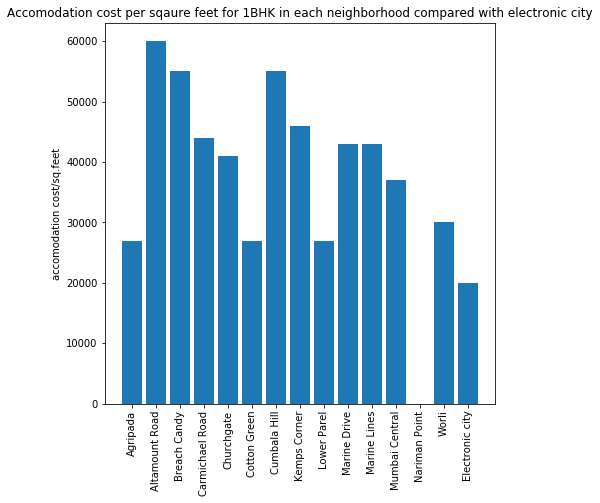

In [95]:
plt.figure(figsize= (7,7))
plt.bar(x= neighbourhood_of_mumbai, height= accomodation)
plt.xticks(rotation =90)
plt.ylabel("accomodation cost/sq.feet")
plt.title("Accomodation cost per sqaure feet for 1BHK in each neighborhood compared with electronic city");

<b> Now comparing price above Agripada, Cotton Green and Lower Parel has relatively lower accomodation cost compared with other neighborhood</b>

Comparing average expenditure cost in Agripada, Cotton Green and Lower Parel for living

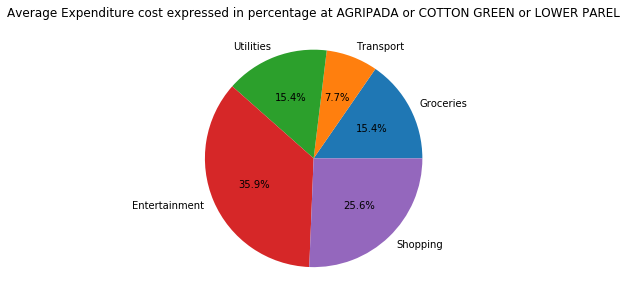

In [96]:
types_of_cost = pd.Series(["Groceries","Transport", "Utilities", "Entertainment","Shopping"])
Respective_cost = pd.Series([3000, 1500, 3000, 7000, 5000])
plt.figure(figsize= (5,5))
plt.pie(x= Respective_cost, labels= types_of_cost,autopct='%1.1f%%')
plt.title("Average Expenditure cost expressed in percentage at AGRIPADA or COTTON GREEN or LOWER PAREL");

<b> Following are the wishes of client that must include in Neighborhood which are Gym and Veg Restaurent</b>

Here now I'am considering Lower Parel for my analysis

In [97]:
def finder(place):   # This function will find specific place and turn json file into dataframe
    radius = 500
    LIMIT= 10
    VERSION= '20180604'
    parel_latitude= float(new_df.loc[new_df["Neighborhood"]== "Lower Parel", "Latitude"])
    parel_longitude = float(new_df.loc[new_df["Neighborhood"]== "Lower Parel", "Longitude"])
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, parel_latitude, parel_longitude, VERSION, place, radius, LIMIT)
    results = requests.get(url).json()
    venue = results['response']['venues']
    dataframe = json_normalize(venue)
    dataframe = dataframe.loc[:, dataframe.columns.intersection(['name','location.address', 'location.lat', 'location.lng'])]
    return (dataframe)

In [98]:
gym = finder("Gym")
gym

,location.address,location.lat,location.lng,name
0,Lower Parel,18.997355,72.831034,Powerhouse Gym


In [99]:
south_indian_restaurant = finder("Veg Restaurant")
south_indian_restaurant

,location.address,location.lat,location.lng,name
0,delai road,18.990774,72.831553,aajra veg restaurant
1,NaN,18.990868,72.831596,Sarvoday pure veg
2,NaN,18.993713,72.831645,Janta Restaurant
3,"Opposite Mathulya Centre, S. B. Road",18.998391,72.827788,Ambience Restaurant & Bar
4,NaN,18.996172,72.828085,Pachu Bar & Restaurant
5,NaN,18.995671,72.827831,Shri Ram
6,Lower Parel,18.997546,72.827000,Red Wok Oriental Restaurant
7,N.M. Joshi Marg,18.993197,72.832205,Ankur Restaurant & Bar
8,"215, B-184 Jodha Mansion,Ganpathrao Kadam Marg",18.998449,72.831472,Modern Family Restaurant
9,NaN,18.991507,72.831511,Atmashanti restaurant
